In [124]:
import os
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [79]:
#QUESTION 1 
#Read in the data and review the non-binary variables to see if any are skewed and need to be transformed. If
#so, transform them and drop the non-transformed versions of the variables. Make sure that you do not include
#the customer identifier id in your calculations. Explain what you found, what transformations you applied,
#and why.

In [80]:
#read in the data 
os.chdir('/Users/prachidalal/Downloads')
resp = pd.read_csv('dmtrain.csv')
resp

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat,response
0,1,2,30.0,20.0,24,1,6,1
1,2,25,207.0,20.0,24,1,6,0
2,3,5,52.0,15.0,24,1,6,0
3,4,11,105.0,15.0,24,1,6,0
4,5,2,32.0,17.0,24,1,6,0
...,...,...,...,...,...,...,...,...
1995,1996,12,105.0,20.0,1,2,6,0
1996,1997,36,786.0,5.0,1,2,6,0
1997,1998,7,415.0,100.0,1,1,7,0
1998,1999,5,77.0,25.0,1,1,7,0


In [81]:
#checking skewedness of non binary variables & applying log transformations 
#n24 
resp['n24'].skew()

1.9356349571999996

In [82]:
n24skewed = np.log(resp['n24'])
print ('Skewness is', n24skewed.skew())

Skewness is -0.4424128778543858


In [83]:
#rev24
resp['rev24'].skew()

7.221134917226376

In [84]:
rev24skewed = np.log(resp['rev24'])
print ('Skewness is', rev24skewed.skew())

Skewness is 0.12762349094028008


In [85]:
#revlast
resp['revlast'].skew()

11.968287586046316

In [86]:
#remove 0s to apply log transformation to revlast & allow a working decision tree 
revlast_col = resp['revlast']
revlast_col.replace(to_replace = 0.0, value = revlast_col.mean(), inplace=True)
revlastskewed = np.log(resp['revlast'])
print ('Skewness is', revlastskewed.skew())

Skewness is -0.04969796692927564


In [87]:
#elpsdm
resp['elpsdm'].skew()

-0.7746755772708429

In [88]:
#ordfreq
resp['ordfreq'].skew()

0.6119393726165964

In [89]:
ordfreqskewed = np.log(resp['ordfreq'])
print ('Skewness is', ordfreqskewed.skew())

Skewness is 0.22977492679280523


In [90]:
#ordcat
resp['ordcat'].skew()

-0.3382214942985173

In [91]:
#dropping non-transformed variables
respNew = resp.copy()
respNew = resp.drop(['n24', 'rev24', 'revlast', 'ordfreq'], axis = 1)
respNew

,id,elpsdm,ordcat,response
0,1,24,6,1
1,2,24,6,0
2,3,24,6,0
3,4,24,6,0
4,5,24,6,0
...,...,...,...,...
1995,1996,1,6,0
1996,1997,1,6,0
1997,1998,1,7,0
1998,1999,1,7,0


In [92]:
#combining dataset with skewed variables to make complete dataframe
respNewa = pd.merge(respNew,n24skewed,left_index = True, right_index = True)
print(respNewa)

        id  elpsdm  ordcat  response       n24
0        1      24       6         1  0.693147
1        2      24       6         0  3.218876
2        3      24       6         0  1.609438
3        4      24       6         0  2.397895
4        5      24       6         0  0.693147
...    ...     ...     ...       ...       ...
1995  1996       1       6         0  2.484907
1996  1997       1       6         0  3.583519
1997  1998       1       7         0  1.945910
1998  1999       1       7         0  1.609438
1999  2000       1       6         0  3.526361

[2000 rows x 5 columns]


In [93]:
respNewb = pd.merge(respNewa,rev24skewed,left_index = True, right_index = True)
print(respNewb)

        id  elpsdm  ordcat  response       n24     rev24
0        1      24       6         1  0.693147  3.401197
1        2      24       6         0  3.218876  5.332719
2        3      24       6         0  1.609438  3.951244
3        4      24       6         0  2.397895  4.653960
4        5      24       6         0  0.693147  3.465736
...    ...     ...     ...       ...       ...       ...
1995  1996       1       6         0  2.484907  4.653960
1996  1997       1       6         0  3.583519  6.666957
1997  1998       1       7         0  1.945910  6.028279
1998  1999       1       7         0  1.609438  4.343805
1999  2000       1       6         0  3.526361  6.150603

[2000 rows x 6 columns]


In [94]:
respNewc = pd.merge(respNewb,revlastskewed,left_index = True, right_index = True)
print(respNewc)

        id  elpsdm  ordcat  response       n24     rev24   revlast
0        1      24       6         1  0.693147  3.401197  2.995732
1        2      24       6         0  3.218876  5.332719  2.995732
2        3      24       6         0  1.609438  3.951244  2.708050
3        4      24       6         0  2.397895  4.653960  2.708050
4        5      24       6         0  0.693147  3.465736  2.833213
...    ...     ...     ...       ...       ...       ...       ...
1995  1996       1       6         0  2.484907  4.653960  2.995732
1996  1997       1       6         0  3.583519  6.666957  1.609438
1997  1998       1       7         0  1.945910  6.028279  4.605170
1998  1999       1       7         0  1.609438  4.343805  3.218876
1999  2000       1       6         0  3.526361  6.150603  3.433987

[2000 rows x 7 columns]


In [95]:
respNewd = pd.merge(respNewc,ordfreqskewed,left_index = True, right_index = True)
print(respNewd)

        id  elpsdm  ordcat  response       n24     rev24   revlast   ordfreq
0        1      24       6         1  0.693147  3.401197  2.995732  0.000000
1        2      24       6         0  3.218876  5.332719  2.995732  0.000000
2        3      24       6         0  1.609438  3.951244  2.708050  0.000000
3        4      24       6         0  2.397895  4.653960  2.708050  0.000000
4        5      24       6         0  0.693147  3.465736  2.833213  0.000000
...    ...     ...     ...       ...       ...       ...       ...       ...
1995  1996       1       6         0  2.484907  4.653960  2.995732  0.693147
1996  1997       1       6         0  3.583519  6.666957  1.609438  0.693147
1997  1998       1       7         0  1.945910  6.028279  4.605170  0.000000
1998  1999       1       7         0  1.609438  4.343805  3.218876  0.000000
1999  2000       1       6         0  3.526361  6.150603  3.433987  0.000000

[2000 rows x 8 columns]


In [96]:
#QUESTION 2
#Generate a decision tree on the entire dataset, without any limitations on the depth of the tree. Use entropy
#as the metric. What is the depth of the tree that is generated? Provide a plot of the tree.

In [97]:
#specify dependent variable
y = respNewd['response'].to_numpy()
y

array([1, 0, 0, ..., 0, 0, 0])

In [98]:
#specify independent variables
X = respNewd.copy()
X = X.drop(['response','id'], axis = 1)
X

,elpsdm,ordcat,n24,rev24,revlast,ordfreq
0,24,6,0.693147,3.401197,2.995732,0.000000
1,24,6,3.218876,5.332719,2.995732,0.000000
2,24,6,1.609438,3.951244,2.708050,0.000000
3,24,6,2.397895,4.653960,2.708050,0.000000
4,24,6,0.693147,3.465736,2.833213,0.000000
...,...,...,...,...,...,...
1995,1,6,2.484907,4.653960,2.995732,0.693147
1996,1,6,3.583519,6.666957,1.609438,0.693147
1997,1,7,1.945910,6.028279,4.605170,0.000000
1998,1,7,1.609438,4.343805,3.218876,0.000000


In [99]:
#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 1)
print(X_train, y_train)
print(X_test, y_test)

      elpsdm  ordcat       n24     rev24   revlast   ordfreq
0         24       6  0.693147  3.401197  2.995732  0.000000
816       15       6  1.609438  3.761200  2.708050  0.693147
790       15       5  2.564949  4.110874  1.609438  1.098612
361       18       5  2.772589  4.919981  2.397895  0.000000
592       16       6  1.945910  4.382027  2.708050  0.693147
...      ...     ...       ...       ...       ...       ...
1791      12       5  1.791759  4.007333  2.397895  1.386294
1096      15       5  2.833213  4.934474  2.484907  0.000000
1932       3       6  2.197225  4.828314  2.708050  1.098612
235       20       6  0.000000  2.708050  2.708050  0.000000
1061      15       5  2.890372  4.912655  2.302585  0.000000

[1600 rows x 6 columns] [1 1 1 ... 1 1 0]
      elpsdm  ordcat       n24     rev24   revlast   ordfreq
674       16       7  2.772589  5.783825  3.401197  0.000000
1699      12       6  1.609438  4.110874  2.639057  1.098612
1282      14       6  1.098612  3.737670  

In [100]:
#making the decision tree
dtree=DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


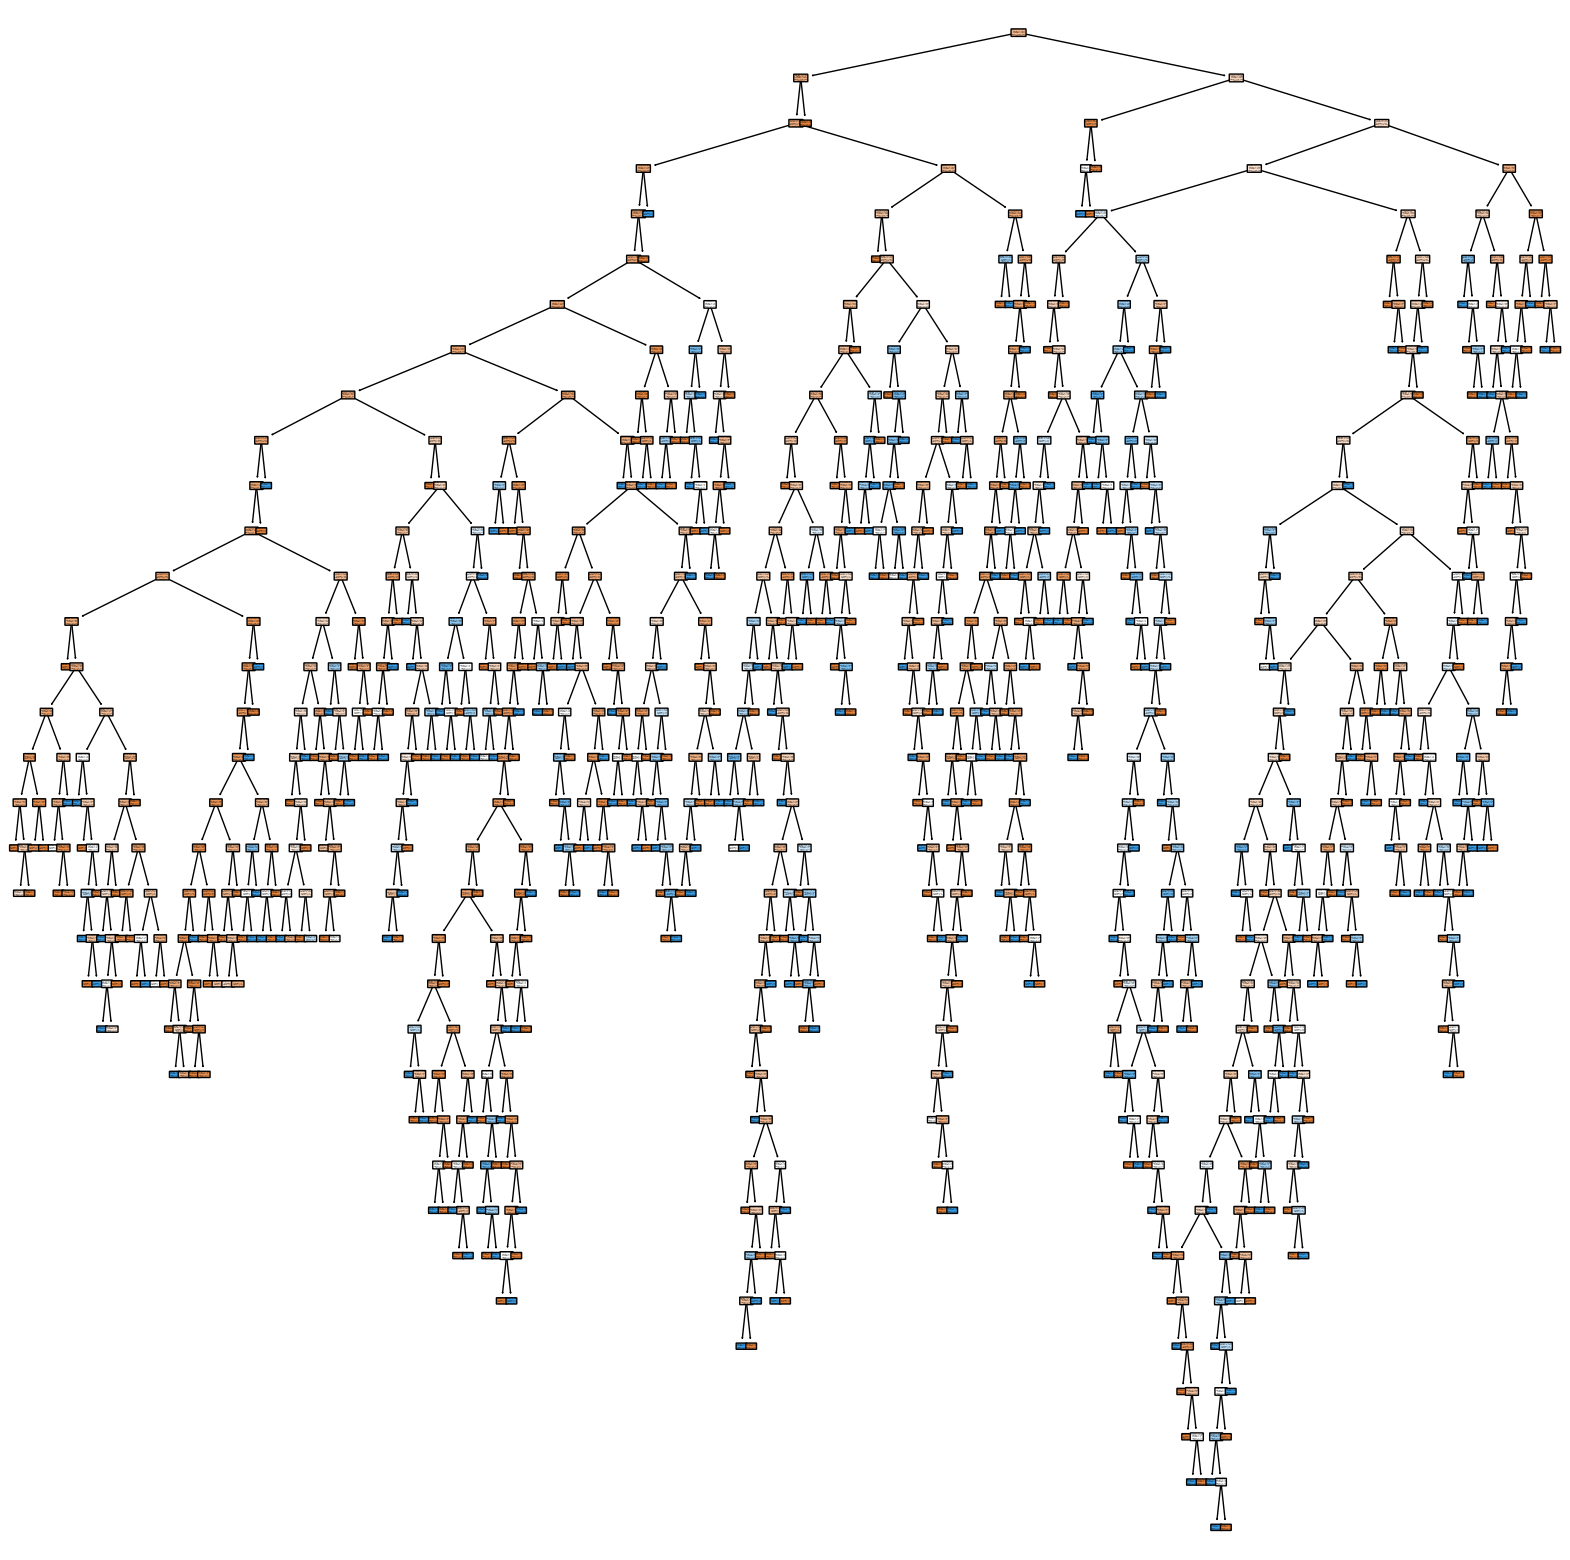

In [101]:
#plot tree
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = resp.columns, class_names = ['no', 'yes'],
                     filled = True , rounded = True)

In [102]:
#find decision tree depth 
print(dtree.tree_.max_depth)

33


In [103]:
#QUESTION 3
#We will focus on decision trees first, and try to identify the best decision tree classifier by pruning the tree at
#different depths. Use 10-fold cross validation and identify the best tree depth (again, using accuracy as the
#metric), by trying as many possible depths as you deem necessary. Provide your reasoning for using the values
#of tree-depth that you tried. Based on your results, what depth do you recommend? What is the accuracy
#associated with this tree depth? If you had to select the three best values of tree-depth, what would they be?

In [104]:
# Define the range of depths to try
depths = range(2, 10)

# Create an empty list to store accuracy scores
accuracy_scores = []

# Loop over each depth and fit a decision tree with that depth
for depth in depths:
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dtree, X_train, y_train, cv=10, scoring='accuracy')
    accuracy_scores.append((depth, np.mean(scores)))

# Print the accuracy scores for each depth
for depth, score in accuracy_scores:
    print(f"Depth: {depth}, Accuracy: {score:.4f}")

Depth: 2, Accuracy: 0.7056
Depth: 3, Accuracy: 0.6937
Depth: 4, Accuracy: 0.7006
Depth: 5, Accuracy: 0.7000
Depth: 6, Accuracy: 0.6944
Depth: 7, Accuracy: 0.6894
Depth: 8, Accuracy: 0.6781
Depth: 9, Accuracy: 0.6587


In [105]:
#comparing tree depths with accuracy 
tree_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]
cv = KFold(n_splits=10, shuffle=True, random_state=42)
mean_scores = []
for depth in tree_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
    mean_scores.append(np.mean(scores))
best_depth = tree_depths[np.argmax(mean_scores)]
print(best_depth)

2


In [106]:
#comparing tree depth to accuracy scoring
depth = []
for i in range(2,33):
    dtree=DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    dtree.fit(X_train,y_train)
    kf =KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(dtree, X, y, scoring='accuracy',cv=kf, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(2, 0.7055), (3, 0.7015), (4, 0.7004999999999999), (5, 0.6944999999999999), (6, 0.6920000000000001), (7, 0.6915), (8, 0.6910000000000001), (9, 0.6835), (10, 0.6815), (11, 0.668), (12, 0.655), (13, 0.6495), (14, 0.642), (15, 0.6449999999999999), (16, 0.6365000000000001), (17, 0.628), (18, 0.615), (19, 0.6130000000000001), (20, 0.601), (21, 0.607), (22, 0.6054999999999999), (23, 0.5985), (24, 0.5974999999999999), (25, 0.5905), (26, 0.5970000000000001), (27, 0.597), (28, 0.5980000000000001), (29, 0.5945), (30, 0.596), (31, 0.5940000000000001), (32, 0.5920000000000001)]


In [107]:
#checking accuracy of tree depth 
depth = []
for i in range(1,15):
    dtree=DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    Accuracy = accuracy_score(y_test,y_pred)*100
    depth.append((i, Accuracy))
print(depth)

[(1, 70.75), (2, 70.75), (3, 70.75), (4, 71.75), (5, 72.25), (6, 72.25), (7, 72.0), (8, 71.5), (9, 70.75), (10, 69.5), (11, 70.25), (12, 69.75), (13, 68.75), (14, 68.5)]


In [108]:
#QUESTION 4
#Next, we will consider random forests. Develop a random forest classifiers with 100 trees, using the three best
#values of tree-depth you identified in the previous question. Provide all relevant results. Which tree-depth
#results in the best random forest classifier? How does it perform relative to the best decision tree?

In [115]:
depths = [2,3,4]

best_model = None
best_score = 0

# Loop over each value of tree-depth and train a random forest
for depth in depths:
    model = RandomForestClassifier(n_estimators=100, max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    print(f"Depth={depth}, accuracy={score}")
    if score > best_score:
        best_model = model
        best_score = score

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_train)
best_score = accuracy_score(y_train, y_pred)
print(f"Best model accuracy: {best_score}")

Depth=2, accuracy=0.708125
Depth=3, accuracy=0.718125
Depth=4, accuracy=0.726875
Best model accuracy: 0.726875


In [44]:
#QUESTION 5
#Repeat this experiment with 50 trees. Provide all relevant results. Does your recommendation change?

In [116]:
depths = [2,3,4]

best_model = None
best_score = 0

# Loop over each value of tree-depth and train a random forest
for depth in depths:
    model = RandomForestClassifier(n_estimators=50, max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    print(f"Depth={depth}, accuracy={score}")
    if score > best_score:
        best_model = model
        best_score = score

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_train)
best_score = accuracy_score(y_train, y_pred)
print(f"Best model accuracy: {best_score}")

Depth=2, accuracy=0.708125
Depth=3, accuracy=0.714375
Depth=4, accuracy=0.71625
Best model accuracy: 0.71625


In [46]:
#QUESTION 6
#We will now consider k-nearest neighbor models. Use 10-fold cross validation and identify the best value of k,
#by trying as many values of k as necessary. Keep in mind that very large values of k can affect speed, and that
#5 is the default – try at least values from 5 to 10 (you can try more if you wish). Provide all relevant results.
#What value of k do you recommend? What is the accuracy associated with this value of k? If you had to select
#the three best values of k, what would they be?

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
k_values = range(5,11)
cv = KFold(n_splits=10, shuffle=True, random_state=1)
mean_scores = []
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
    mean_scores.append((k, np.mean(scores)))
print(mean_scores)

/Users/prachidalal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/prachidalal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

[(5, 0.6625000000000001), (6, 0.684375), (7, 0.6625000000000001), (8, 0.685625), (9, 0.66875), (10, 0.694375)]


/Users/prachidalal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/prachidalal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

In [118]:
#QUESTION 7
#Develop a logistic regression model using 10-fold cross validation. What is the associated accuracy?

In [121]:
clf = LogisticRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
mean_score = np.mean(scores)
print(mean_score)

0.7112499999999999


In [52]:
#QUESTION 8
#Develop a logistic regression model on the entire training dataset. Provide the output. What is the model
#developed?

In [53]:
from sklearn.metrics import classification_report
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.83       283
           1       0.83      0.04      0.08       117

    accuracy                           0.72       400
   macro avg       0.77      0.52      0.46       400
weighted avg       0.75      0.72      0.61       400



In [ ]:
#QUESTION 9
#Using the four best models identified in each category (decision tree, random forest, k-nearest neighbor, 
#logistic regression), perform an evaluation with 10-fold cross-validation. Your results should be similar 
#(but not necessarily identical) to the results you have already obtained for these models. Across these 
#four models, which one would you recommend, and why? 

In [55]:
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KN', KNeighborsClassifier()))

In [126]:
from sklearn import model_selection
metric = 'accuracy'
resultsA = []
mIDsA = []
for mID, mdl in models:
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train, y_train, cv=kf, scoring=metric)
    resultsA.append(cvres)
    mIDsA.append(mID)
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

DT: 0.599375 (0.035515)
LR: 0.710625 (0.008409)
RF: 0.661250 (0.020310)
KN: 0.662500 (0.022361)


/Users/prachidalal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/prachidalal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

In [57]:
#QUESTION 10
#Use the entire dataset to develop a final version of the recommended model for testing. Provide all details of
#the model (and the tree if the recommended model is the decision tree). What is that accuracy of this model
#on the training dataset?

In [127]:
from sklearn.metrics import classification_report
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.83       283
           1       0.83      0.04      0.08       117

    accuracy                           0.72       400
   macro avg       0.77      0.52      0.46       400
weighted avg       0.75      0.72      0.61       400



In [58]:
#QUESTION 11
#Read the file dmtest.csv and make predictions (using the final model) on which customers are likely to respond,
#and which are not. The predictions have to be 0 or 1 – if the model you selected naturally gives a probability
#score, use 0.5 as the threshold to determine whether your prediction will be 0 or 1. For example, if you use
#a logistic regression model that gives you a probability estimate of 0.51, the prediction should be 1, and if it
#gives a a probability estimate of 0.49, the prediction should be 0.

#Create a file groupxxdmtest.csv that adds a column named “prediction” to the original variables in dmtest.csv
#and submit it with your report. I will assess the quality of your predictions based on the actual values (which
#are not included in dmtest.csv).

In [155]:
os.chdir('/Users/prachidalal/Downloads')
test = pd.read_csv('dmtest.csv')
test

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat
0,5001,5,186.0,18,24,1,6
1,5002,2,30.0,15,24,1,6
2,5003,24,362.0,30,24,1,7
3,5004,4,41.0,15,24,1,6
4,5005,5,59.0,18,24,1,6
...,...,...,...,...,...,...,...
1995,6996,9,165.0,0,1,1,7
1996,6997,11,149.0,15,1,3,6
1997,6998,18,161.0,13,1,2,5
1998,6999,26,427.0,25,1,4,7


In [158]:
testNew = test.copy()
testNew = test.drop(['id','n24','rev24','revlast','ordfreq'], axis=1)
testNew

,elpsdm,ordcat
0,24,6
1,24,6
2,24,7
3,24,6
4,24,6
...,...,...
1995,1,7
1996,1,6
1997,1,5
1998,1,7


In [159]:
#checking skewedness of non binary variables & applying log transformations 
#n24 
test['n24'].skew()

1.6064772204270752

In [160]:
n24skewedT = np.log(test['n24'])
print ('Skewness is', n24skewedT.skew())

Skewness is -0.38865488863108105


In [161]:
#checking skewedness of non binary variables & applying log transformations 
#rev24 
test['rev24'].skew()

3.803566117657385

In [162]:
rev24skewedT = np.log(test['rev24'])
print ('Skewness is', rev24skewedT.skew())

Skewness is 0.009316461060418897


In [163]:
#checking skewedness of non binary variables & applying log transformations 
#revlast 
test['revlast'].skew()

6.446900913517198

In [164]:
#remove 0s to apply log transformation to revlast & allow a working decision tree 
revlast_colT = test['revlast']
revlast_colT.replace(to_replace = 0.0, value = revlast_colT.mean(), inplace=True)
revlastskewedT = np.log(test['revlast'])
print ('Skewness is', revlastskewedT.skew())

Skewness is -0.2889594336661163


In [165]:
#checking skewedness of non binary variables & applying log transformations 
#elpsdm 
test['elpsdm'].skew()

-0.7031733810689551

In [166]:
#checking skewedness of non binary variables & applying log transformations 
#ordfreq 
test['ordfreq'].skew()

0.7113078235943826

In [167]:
ordfreqskewedT = np.log(test['ordfreq'])
print ('Skewness is', ordfreqskewedT.skew())

Skewness is 0.34840146189856763


In [168]:
#checking skewedness of non binary variables & applying log transformations 
#ordcat 
test['ordcat'].skew()

-0.3578226868005254

In [169]:
#combining dataset with skewed variables to make complete dataframe
testN = pd.merge(testNew,n24skewedT,left_index = True, right_index = True)
print(testN)

      elpsdm  ordcat       n24
0         24       6  1.609438
1         24       6  0.693147
2         24       7  3.178054
3         24       6  1.386294
4         24       6  1.609438
...      ...     ...       ...
1995       1       7  2.197225
1996       1       6  2.397895
1997       1       5  2.890372
1998       1       7  3.258097
1999       1       6  2.197225

[2000 rows x 3 columns]


In [171]:
#combining dataset with skewed variables to make complete dataframe
testN1 = pd.merge(testN,rev24skewedT,left_index = True, right_index = True)
print(testN1)

      elpsdm  ordcat       n24     rev24
0         24       6  1.609438  5.225747
1         24       6  0.693147  3.401197
2         24       7  3.178054  5.891644
3         24       6  1.386294  3.713572
4         24       6  1.609438  4.077537
...      ...     ...       ...       ...
1995       1       7  2.197225  5.105945
1996       1       6  2.397895  5.003946
1997       1       5  2.890372  5.081404
1998       1       7  3.258097  6.056784
1999       1       6  2.197225  4.828314

[2000 rows x 4 columns]


In [172]:
#combining dataset with skewed variables to make complete dataframe
testN2 = pd.merge(testN1,revlastskewedT,left_index = True, right_index = True)
print(testN2)

      elpsdm  ordcat       n24     rev24   revlast
0         24       6  1.609438  5.225747  2.890372
1         24       6  0.693147  3.401197  2.708050
2         24       7  3.178054  5.891644  3.401197
3         24       6  1.386294  3.713572  2.708050
4         24       6  1.609438  4.077537  2.890372
...      ...     ...       ...       ...       ...
1995       1       7  2.197225  5.105945  2.815109
1996       1       6  2.397895  5.003946  2.708050
1997       1       5  2.890372  5.081404  2.564949
1998       1       7  3.258097  6.056784  3.218876
1999       1       6  2.197225  4.828314  2.815109

[2000 rows x 5 columns]


In [173]:
#combining dataset with skewed variables to make complete dataframe
testN3 = pd.merge(testN2,ordfreqskewedT,left_index = True, right_index = True)
print(testN3)

      elpsdm  ordcat       n24     rev24   revlast   ordfreq
0         24       6  1.609438  5.225747  2.890372  0.000000
1         24       6  0.693147  3.401197  2.708050  0.000000
2         24       7  3.178054  5.891644  3.401197  0.000000
3         24       6  1.386294  3.713572  2.708050  0.000000
4         24       6  1.609438  4.077537  2.890372  0.000000
...      ...     ...       ...       ...       ...       ...
1995       1       7  2.197225  5.105945  2.815109  0.000000
1996       1       6  2.397895  5.003946  2.708050  1.098612
1997       1       5  2.890372  5.081404  2.564949  0.693147
1998       1       7  3.258097  6.056784  3.218876  1.386294
1999       1       6  2.197225  4.828314  2.815109  0.000000

[2000 rows x 6 columns]


In [174]:
#define predictor variables
X_test = testN3

In [175]:
final_model = LogisticRegression()
final_model.fit(X, y)
# Make predictions on the test set
y_pred = final_model.predict(X_test)
# Convert the probabilities to 0 or 1 based on a threshold of 0.5
y_pred_binary = [1 if proba >= 0.5 else 0 for proba in final_model.predict_proba(X_test)[:,1]]
# Add the predictions to the test dataset
test["predicted"] = y_pred_binary
print(y_pred_binary)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [176]:
#create new csv file with predictor variables 
test.to_csv("group01dmtest.csv", index=False)

In [177]:
os.chdir('/Users/prachidalal/Downloads')
testPred = pd.read_csv('group01dmtest.csv')
testPred

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat,predicted
0,5001,5,186.0,18.000,24,1,6,0
1,5002,2,30.0,15.000,24,1,6,0
2,5003,24,362.0,30.000,24,1,7,0
3,5004,4,41.0,15.000,24,1,6,0
4,5005,5,59.0,18.000,24,1,6,0
...,...,...,...,...,...,...,...,...
1995,6996,9,165.0,16.695,1,1,7,0
1996,6997,11,149.0,15.000,1,3,6,0
1997,6998,18,161.0,13.000,1,2,5,0
1998,6999,26,427.0,25.000,1,4,7,0


In [178]:
check = testPred['predicted']
check

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: predicted, Length: 2000, dtype: int64

In [179]:
check2 = resp['response']
check2

0       1
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: response, Length: 2000, dtype: int64

In [180]:
Check12 = pd.DataFrame.merge(check,check2,left_index = True, right_index = True)
Check12

,predicted,response
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,0,0


In [181]:
#check difference in values 
print(Check12.loc[Check12['predicted'] != Check12['response']])

      predicted  response
0             0         1
5             0         1
6             0         1
7             0         1
8             0         1
...         ...       ...
1982          0         1
1983          0         1
1984          0         1
1985          0         1
1987          1         0

[591 rows x 2 columns]


In [68]:
#QUESTION 12
#if you were to focus on the “lapsing customers” (customers who made their last purchase 13 to 24 months ago)
#do you expect your model to be different? For the selected model, compare the quality of predictions for these
#customers relative to predictions for the others on records in the training set. Discuss your findings.

In [189]:
filtered_df = respNewd[(respNewd['elpsdm'] >= 12) & (respNewd['elpsdm'] <= 24)]
filtered_df

,id,elpsdm,ordcat,response,n24,rev24,revlast,ordfreq
0,1,24,6,1,0.693147,3.401197,2.995732,0.000000
1,2,24,6,0,3.218876,5.332719,2.995732,0.000000
2,3,24,6,0,1.609438,3.951244,2.708050,0.000000
3,4,24,6,0,2.397895,4.653960,2.708050,0.000000
4,5,24,6,0,0.693147,3.465736,2.833213,0.000000
...,...,...,...,...,...,...,...,...
1883,1884,12,5,0,2.397895,4.393214,2.302585,1.386294
1884,1885,12,6,0,1.791759,4.382027,2.995732,0.693147
1885,1886,12,6,0,0.693147,3.218876,2.302585,0.693147
1886,1887,12,5,0,2.995732,5.056246,2.302585,0.000000


In [194]:
#specify dependent variable
y1 = filtered_df['response'].to_numpy()
y1

array([1, 0, 0, ..., 0, 0, 0])

In [195]:
#specify independent variables
X1 = filtered_df.copy()
X1 = X1.drop(['response','id'], axis = 1)
X1

,elpsdm,ordcat,n24,rev24,revlast,ordfreq
0,24,6,0.693147,3.401197,2.995732,0.000000
1,24,6,3.218876,5.332719,2.995732,0.000000
2,24,6,1.609438,3.951244,2.708050,0.000000
3,24,6,2.397895,4.653960,2.708050,0.000000
4,24,6,0.693147,3.465736,2.833213,0.000000
...,...,...,...,...,...,...
1883,12,5,2.397895,4.393214,2.302585,1.386294
1884,12,6,1.791759,4.382027,2.995732,0.693147
1885,12,6,0.693147,3.218876,2.302585,0.693147
1886,12,5,2.995732,5.056246,2.302585,0.000000


In [197]:
#split into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1 , y1, test_size = 0.2, random_state = 1)
print(X_train1, y_train1)
print(X_test1, y_test1)

      elpsdm  ordcat       n24     rev24   revlast   ordfreq
303       19       6  2.944439  5.231109  2.708050  0.693147
1116      15       5  1.609438  3.806662  2.484907  1.098612
1541      13       6  0.000000  2.995732  2.995732  0.000000
1138      15       6  2.397895  4.454347  2.302585  0.693147
804       15       4  3.135494  4.709530  1.386294  1.386294
...      ...     ...       ...       ...       ...       ...
905       15       4  3.401197  5.247024  1.791759  1.386294
1791      12       5  1.791759  4.007333  2.397895  1.386294
1096      15       5  2.833213  4.934474  2.484907  0.000000
235       20       6  0.000000  2.708050  2.708050  0.000000
1061      15       5  2.890372  4.912655  2.302585  0.000000

[1510 rows x 6 columns] [1 0 0 ... 0 1 0]
      elpsdm  ordcat       n24     rev24   revlast   ordfreq
1189      14       6  0.693147  3.258097  2.772589  0.693147
512       17       7  1.098612  4.605170  3.912023  0.000000
1476      13       6  2.079442  4.442651  

In [198]:
clf1 = LogisticRegression()
cv1 = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(clf, X_train1, y_train1, cv=cv1, scoring='accuracy')
mean_score = np.mean(scores)
print(mean_score)

0.7271523178807946
